### A1.Implementasi metode: Lineaar Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Muat Dataset
df = pd.read_csv("house_prices_dataset.csv")

# Tampilkan kolom untuk verifikasi
print("Daftar kolom dalam dataset:")
print(df.columns.tolist())

# Pilih fitur (X) dan target (y)
X = df[["square_feet"]].values   # fitur input (luas rumah)
y = df["price"].values           # target output (harga rumah)

# Bagi data (gaya modul: latih dari semua data kecuali 50 terakhir)
X_train = X[:-50]
y_train = y[:-50]
X_test = X[-50:]
y_test = y[-50:]

# Buat dan latih model Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Prediksi data uji
y_pred = reg.predict(X_test)


Daftar kolom dalam dataset:
['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']


### Penjelasan
Model Linear Regression digunakan untuk memprediksi harga rumah berdasarkan luas rumah (square_feet).
Data dibagi menjadi dua bagian: data latih (semua kecuali 50 data terakhir) dan data uji (50 data terakhir).
Model kemudian dilatih untuk menemukan hubungan linear antara luas rumah dan harga.

### A2. Hasil prediksi harus dievaluasi masing-masing: Regresi

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model Linear Regression:")
print(f"MAE  : {mae:.2f}") # rata-rata kesalahan absolut.
print(f"MSE  : {mse:.2f}") # rata-rata kuadrat kesalahan.
print(f"RMSE : {rmse:.2f}") # akar MSE (kesalahan dalam satuan harga).
print(f"R²   : {r2:.4f}") # mengukur seberapa baik model menjelaskan variasi data Nilai R² yang semakin mendekati 1 menunjukkan model semakin baik dalam memprediksi harga.

Evaluasi Model Linear Regression:
MAE  : 60082.50
MSE  : 4784684567.22
RMSE : 69171.41
R²   : 0.4360


### Penjelasan
Berdasarkan hasil evaluasi, model Linear Regression memiliki MAE sebesar 60.082, RMSE sebesar 69.171, dan R² sebesar 0.436.
Artinya, model masih memiliki rata-rata kesalahan prediksi sekitar 60–70 ribu dari harga sebenarnya, dan baru mampu menjelaskan 43,6% variasi harga rumah berdasarkan luas bangunan.
Nilai R² menunjukkan bahwa hubungan antara luas rumah dan harga cukup kuat, namun belum sepenuhnya menjelaskan seluruh variasi harga karena hanya menggunakan satu label (square_feet).

### A3. Visualisasi plot

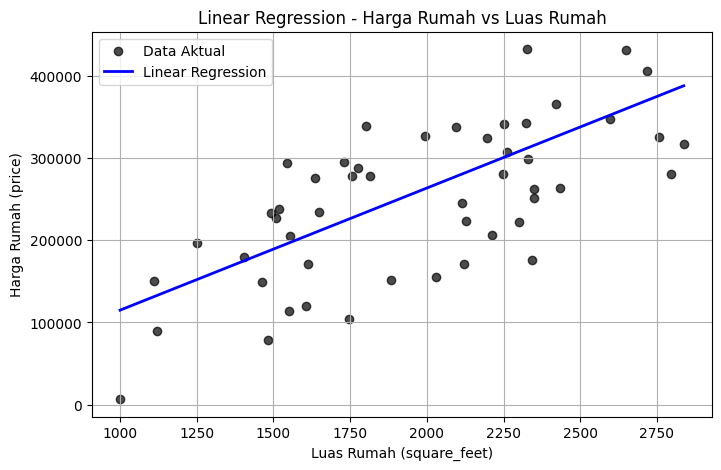

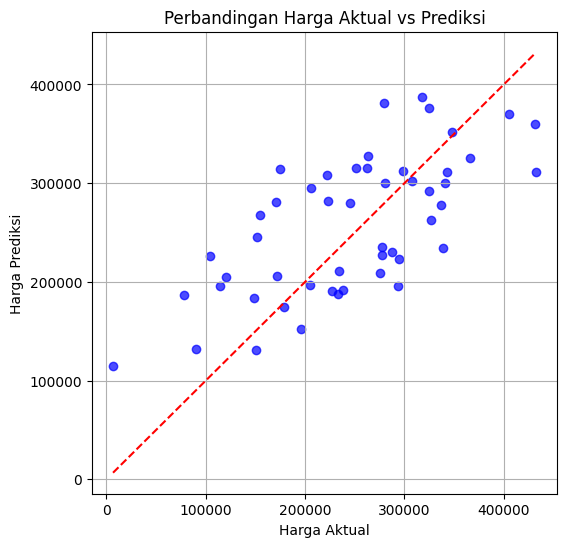

In [3]:
# Urutkan data agar garis prediksi halus dan tidak tumpang tindih
sorted_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot hubungan luas rumah vs harga rumah
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="black", label="Data Aktual", alpha=0.7)
plt.plot(X_test_sorted, y_pred_sorted, color="blue", linewidth=2, label="Linear Regression")
plt.title("Linear Regression - Harga Rumah vs Luas Rumah")
plt.xlabel("Luas Rumah (square_feet)")
plt.ylabel("Harga Rumah (price)")
plt.legend()
plt.grid(True)
plt.show()

# Plot perbandingan harga aktual vs prediksi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Perbandingan Harga Aktual vs Prediksi")
plt.grid(True)
plt.show()

### Penjelasan
Grafik pertama memperlihatkan hubungan antara luas rumah (square_feet) dan harga rumah (price).
Titik hitam menunjukkan data aktual, sedangkan garis biru mewakili hasil prediksi model Linear Regression.
Terlihat bahwa garis prediksi memiliki kemiringan positif, artinya semakin besar luas rumah, maka harga cenderung meningkat — sesuai dengan logika pasar.

Grafik kedua menunjukkan perbandingan antara harga aktual dan harga prediksi.
Titik biru yang mendekati garis merah diagonal menandakan prediksi model cukup akurat, sementara titik yang menjauh menunjukkan adanya sedikit perbedaan antara nilai aktual dan hasil prediksi.

Secara keseluruhan, visualisasi ini menggambarkan bahwa model berhasil menemukan pola linear antara luas rumah dan harga, meskipun masih terdapat penyimpangan kecil akibat faktor lain yang tidak dimasukkan ke dalam model